In [176]:
import os
os.getcwd()
os.chdir('C:\\Users\\dell\\DS-Data files')

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [178]:
data=pd.read_csv('bank-full (1).csv',sep=';') #sep=seprator 

In [179]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [180]:
# checked shape of dataset
data.shape

(45211, 17)

In [181]:
# checked is there any null values in dataset
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [182]:
# checked their data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [183]:
# data.head(3)

In [184]:
# data['y'].dtype

In [185]:
from sklearn.preprocessing import LabelEncoder

In [186]:
# used label encoder to 
l_e=LabelEncoder()

In [187]:
data['y']=l_e.fit_transform(data['y'])

In [188]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [189]:
# used groupby so we can check the average details of custmers are getting yes and no with respected criteria as well
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [190]:
# cheked for the target data is balance are imbalance
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [191]:
print('0 is in dataset :' ,39922/45211*100)

0 is in dataset : 88.30151954170445


In [192]:
print('1 is in dataset :' ,5289/45211*100)

1 is in dataset : 11.698480458295547


In [193]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [194]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [195]:
data.shape

(45211, 17)

In [196]:
x=data.loc[:,['age','balance','duration','campaign','pdays','previous']]
y=data.iloc[:,[16]]

In [197]:
from sklearn.model_selection import train_test_split

In [198]:
# then splited into train test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [199]:
from imblearn.over_sampling import SMOTE

In [200]:
# we balance the data using smote method
sm=SMOTE(random_state=42)
x_train,y_train=sm.fit_resample(x_train,y_train)

In [201]:
y_train=np.array(y_train)
y_train=y_train.reshape(-1)

In [202]:
from sklearn.linear_model import LogisticRegression

In [203]:
lr=LogisticRegression(random_state=42,max_iter=300)

In [204]:
from sklearn.model_selection import GridSearchCV

In [205]:
# i used grid search cross validation to get best params 
parameter={'penalty':['l2','l1','elasticnet'],'C':range(1,50)}

In [206]:
grid_reg=GridSearchCV(lr,param_grid=parameter,scoring='accuracy')

In [207]:
model=grid_reg.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
490 fits failed out of a total of 735.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
245 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueE

In [208]:
# checked the best params
print(grid_reg.best_params_)

{'C': 10, 'penalty': 'l2'}


In [209]:
# checked best score
print(grid_reg.best_score_)

0.7520211045481896


In [210]:
# then we predict test data and puted into new variable
y_pred=grid_reg.predict(x_test)

In [211]:
from sklearn.metrics import accuracy_score,classification_report

In [212]:
score=accuracy_score(y_test,y_pred)

In [213]:
score

0.781111766440578

In [214]:
# we checked classification report in which we get the accuracy,recall,precision and etc
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87     10041
           1       0.67      0.31      0.42      3523

    accuracy                           0.78     13564
   macro avg       0.73      0.63      0.64     13564
weighted avg       0.76      0.78      0.75     13564



In [215]:
from sklearn.metrics import roc_curve,roc_auc_score

Text(0, 0.5, 'True Positive Rate')

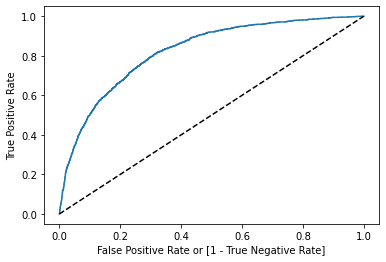

In [216]:
# then we check using ROC curve and ROC AUC score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test,grid_reg.predict_proba(x_test)[:,1]) # 1 and 0

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr,  label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [217]:
# false pasitive ratio 
fpr

array([0.00000000e+00, 8.35701153e-05, 8.35701153e-05, ...,
       9.92311549e-01, 9.92311549e-01, 1.00000000e+00])

In [218]:
thresholds

array([1.99999935e+00, 9.99999348e-01, 9.99980492e-01, ...,
       1.94202572e-03, 1.90789378e-03, 4.58829336e-06])

In [219]:
auc

0.7344228024458954